# Project 2 Naya Data Scientist training course: Sberbank

1. Load The data, turn the date into datetime type
2. Find what was the Month, week, day that had the most sales, highest sales prices
3. Calculate the price per one **life_sq**
4. Find the **sub_area** that have the highest prices per **sub_area**
5. for each one of the sub areas what are the top 3 columns with the largest number of nuls
6. Choose a **sub_area** and for each of the 3 columns with the most number of nuls:
   Find a value to fill these nuls, explain why you chose this value

By: Ayelet Ben-Hur Pik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
color = sns.color_palette()
#import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

%matplotlib inline


In [2]:
sberbank_train_df=pd.read_csv('../input/train.csv')
sberbank_train_df_raw=pd.read_csv('../input/train.csv')

In [3]:
sberbank_train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
sberbank_train_df.shape

(30471, 292)

In [5]:
#sberbank_train_df['timestamp_new']=pd.to_datetime(sberbank_train_df['timestamp'],
#                                   format='%Y-%m-%d',
#                                   errors='coerce')

sberbank_train_df['priceUsd']=(sberbank_train_df['price_doc']/57)
sberbank_train_df['price_1_life_sq']=(sberbank_train_df['priceUsd']/sberbank_train_df['life_sq'])
sberbank_train_df['timestamp_new']=pd.to_datetime(sberbank_train_df['timestamp'])
sberbank_train_df['year']=sberbank_train_df['timestamp_new'].dt.year
sberbank_train_df['month']=sberbank_train_df['timestamp_new'].dt.month
sberbank_train_df['week']=sberbank_train_df['timestamp_new'].dt.week
sberbank_train_df['weekday']=sberbank_train_df['timestamp_new'].dt.weekday_name
sberbank_train_df['day']=sberbank_train_df['timestamp_new'].dt.day

pd.options.display.max_columns = 100
sberbank_train_df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,...,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,priceUsd,price_1_life_sq,timestamp_new,year,month,week,weekday,day
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,...,1419204,68,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,102631.578947,3801.169591,2011-08-20,2011,8,33,Saturday,20
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,34200,42084,15727,7925,7802,70194,35622,34572,...,491565,30,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,105263.157895,5540.166205,2011-08-23,2011,8,34,Tuesday,23
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,101982,46076,55906,13028,6835,6193,63388,31813,31575,...,52550,41,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,100000.000000,3448.275862,2011-08-27,2011,8,34,Saturday,27
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,21155,9828,11327,28563,14680,13883,120381,60040,60341,...,205756,32,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,229824.561404,4596.491228,2011-09-01,2011,9,35,Thursday,1
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,28179,13522,14657,13368,7159,6209,68043,34236,33807,...,2296870,1068,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853

In [6]:
priceUsd_groupby_month=sberbank_train_df.groupby('month')['priceUsd'].agg(['count','mean','median','max','sum'])
priceUsd_groupby_week=sberbank_train_df.groupby('week')['priceUsd'].agg(['count','mean','median','max','sum'])
priceUsd_groupby_weekday=sberbank_train_df.groupby('weekday')['priceUsd'].agg(['count','mean','median','max','sum'])

In [7]:
priceUsd_groupby_month.head()

,count,mean,median,max,sum
month,,,,,
1,1809,126498.958211,110526.315789,1.249993e+06,2.288366e+08
2,2275,125350.694282,111163.982456,9.736842e+05,2.851728e+08
3,2972,128439.683042,111070.105263,1.668816e+06,3.817227e+08
4,3191,128856.951189,112684.210526,1.597651e+06,4.111825e+08
5,2496,129255.391588,110716.236842,1.949318e+06,3.226215e+08


In [8]:
priceUsd_groupby_month.sort_values('median',ascending=False).head()

,count,mean,median,max,sum
month,,,,,
4,3191,128856.951189,112684.210526,1.597651e+06,4.111825e+08
6,2570,126202.415196,112600.894737,9.649123e+05,3.243402e+08
2,2275,125350.694282,111163.982456,9.736842e+05,2.851728e+08
3,2972,128439.683042,111070.105263,1.668816e+06,3.817227e+08
5,2496,129255.391588,110716.236842,1.949318e+06,3.226215e+08


** Q2 - The month with the most sales**

In [9]:
priceUsd_groupby_month[priceUsd_groupby_month['count']==priceUsd_groupby_month['count'].max()].index[0]

12

**Q2 - The month with the highest sales prices**

In [10]:
priceUsd_groupby_month[priceUsd_groupby_month['median']==priceUsd_groupby_month['median'].max()].index[0]

4

In [11]:
priceUsd_groupby_week.sort_values('median',ascending=False).head()

,count,mean,median,max,sum
week,,,,,
1,107,139233.789966,117543.859649,3.576914e+05,1.489802e+07
25,572,123812.205956,114478.228070,7.192982e+05,7.082058e+07
17,725,128562.146134,114035.087719,9.122807e+05,9.320756e+07
36,482,130505.793004,113904.552632,1.035523e+06,6.290379e+07
22,744,133140.684022,113517.631579,1.417148e+06,9.905667e+07


** Q2 - The week with the most sales**

In [12]:
priceUsd_groupby_week[priceUsd_groupby_week['count']==priceUsd_groupby_week['count'].max()].index[0]

51

**Q2 - The week with the highest sales prices**

In [13]:
priceUsd_groupby_week[priceUsd_groupby_week['median']==priceUsd_groupby_week['median'].max()].index[0]

1

In [14]:
priceUsd_groupby_weekday.sort_values('count',ascending=False).head()

,count,mean,median,max,sum
weekday,,,,,
Tuesday,6091,123711.150299,108771.929825,1.249123e+06,7.535246e+08
Wednesday,5862,126652.676402,110526.315789,1.382496e+06,7.424380e+08
Thursday,5539,125898.834963,109898.894737,1.949318e+06,6.973536e+08
Monday,5516,123712.791182,110526.315789,1.350877e+06,6.823998e+08
Friday,4978,126994.681159,110529.824561,1.597651e+06,6.321795e+08


**Q2 - The week day with the most sales**

In [15]:
priceUsd_groupby_weekday[priceUsd_groupby_weekday['count']==priceUsd_groupby_weekday['count'].max()].index[0]

'Tuesday'

**Q2 - The week day with the highest sales prices**

In [16]:
priceUsd_groupby_weekday[priceUsd_groupby_weekday['median']==priceUsd_groupby_weekday['median'].max()].index[0]

'Friday'

In [19]:
priceUsd1Lsm_groupby_SubArea=sberbank_train_df.groupby('sub_area')['price_1_life_sq'].agg(['count','mean','median','max','sum'])
priceUsd1Lsm_groupby_SubArea.head()

,count,mean,median,max,sum
sub_area,,,,,
Ajeroport,122,5078.770668,5322.612086,10799.220273,6.196100e+05
Akademicheskoe,211,5483.046198,5319.548872,16842.105263,1.156923e+06
Alekseevskoe,96,5201.506755,5492.424242,9833.795014,4.993446e+05
Altuf'evskoe,68,3629.018449,4040.404040,6803.728070,2.467733e+05
Arbat,15,8431.372084,8832.425892,14447.884417,1.264706e+05


In [20]:
priceUsd1Lsm_groupby_SubArea.sort_values('median',ascending=False).head()

,count,mean,median,max,sum
sub_area,,,,,
Arbat,15,8431.372084,8832.425892,14447.884417,126470.581257
Hamovniki,86,9282.197587,7761.338831,132547.438596,798268.992514
Meshhanskoe,91,6252.485151,6609.195402,13495.276653,568976.148739
Dorogomilovo,56,6455.833507,6571.873231,13157.894737,361526.676417
Zamoskvorech'e,47,6430.702358,6567.701305,10768.300060,302243.010827


**Q4 - The sub_area with the highest prices per 1 life Sqm (in Usd)**

In [21]:
priceUsd1Lsm_groupby_SubArea[priceUsd1Lsm_groupby_SubArea['median']==priceUsd1Lsm_groupby_SubArea['median'].max()].index[0]

'Arbat'

In [22]:
df_isnull=sberbank_train_df.isnull().astype(int)
df_isnull.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,...,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,priceUsd,price_1_life_sq,timestamp_new,year,month,week,weekday,day
0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df_temp=df_isnull.groupby(sberbank_train_df_raw['sub_area']).sum()
df_temp.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,...,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,priceUsd,price_1_life_sq,timestamp_new,year,month,week,weekday,day
sub_area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajeroport,0,0,0,1,0,47,47,48,47,47,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Akademicheskoe,0,0,0,0,0,56,56,60,56,56,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alekseevskoe,0,0,0,4,0,33,33,35,33,33,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
Altuf'evskoe,0,0,0,0,0,23,23,23,23,23,33,0,0,0,0,0,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arbat,0,0,0,0,0,7,7,7,7,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Q5 - for each one of the sub areas: the top 3 columns with the largest number of nuls**

In [24]:
sub_area_most3nulls_dict={}
for ind in df_temp.index:
    sub_area_most3nulls_dict[ind]=[df_temp.loc[ind].sort_values(ascending=False).index[0]]
    sub_area_most3nulls_dict[ind].append(df_temp.loc[ind].sort_values(ascending=False)[0])
    sub_area_most3nulls_dict[ind].append(df_temp.loc[ind].sort_values(ascending=False).index[1])
    sub_area_most3nulls_dict[ind].append(df_temp.loc[ind].sort_values(ascending=False)[1])
    sub_area_most3nulls_dict[ind].append(df_temp.loc[ind].sort_values(ascending=False).index[2])
    sub_area_most3nulls_dict[ind].append(df_temp.loc[ind].sort_values(ascending=False)[2])
    
sub_area_most3nulls=pd.DataFrame(sub_area_most3nulls_dict).T
sub_area_most3nulls.columns=['MostNulsCol1_Name','MostNulsCol1_Count','MostNulsCol2_Name','MostNulsCol2_Count','MostNulsCol3_Name','MostNulsCol3_Count']
sub_area_most3nulls.head()

,MostNulsCol1_Name,MostNulsCol1_Count,MostNulsCol2_Name,MostNulsCol2_Count,MostNulsCol3_Name,MostNulsCol3_Count
Ajeroport,state,51,build_year,48,material,47
Akademicheskoe,state,75,build_year,60,max_floor,56
Alekseevskoe,state,37,build_year,35,material,33
Altuf'evskoe,hospital_beds_raion,68,state,33,max_floor,23
Arbat,state,9,max_floor,7,material,7


In [26]:
temp_df=sberbank_train_df.groupby('sub_area')['price_1_life_sq'].agg(['count','median'])
temp_df['area_trans_prop']=temp_df['count']/sberbank_train_df.shape[0]
temp_df.columns=['num_transactions','median_price1Lsqm_Usd','area_trans_prop']
temp_df.head()

,num_transactions,median_price1Lsqm_Usd,area_trans_prop
sub_area,,,
Ajeroport,122,5322.612086,0.004004
Akademicheskoe,211,5319.548872,0.006925
Alekseevskoe,96,5492.424242,0.003151
Altuf'evskoe,68,4040.404040,0.002232
Arbat,15,8832.425892,0.000492


** In order to decide in what sub area to focus in filling NA fildes:
I applied, for each sub_area transactions in "sub_area_most3nulls" DF, proportion & median price for 1 life Sqm**

In [27]:
result=pd.concat([sub_area_most3nulls,temp_df],axis=1)
result.head()

,MostNulsCol1_Name,MostNulsCol1_Count,MostNulsCol2_Name,MostNulsCol2_Count,MostNulsCol3_Name,MostNulsCol3_Count,num_transactions,median_price1Lsqm_Usd,area_trans_prop
sub_area,,,,,,,,,
Ajeroport,state,51,build_year,48,material,47,122,5322.612086,0.004004
Akademicheskoe,state,75,build_year,60,max_floor,56,211,5319.548872,0.006925
Alekseevskoe,state,37,build_year,35,material,33,96,5492.424242,0.003151
Altuf'evskoe,hospital_beds_raion,68,state,33,max_floor,23,68,4040.404040,0.002232
Arbat,state,9,max_floor,7,material,7,15,8832.425892,0.000492


In [28]:
result.sort_values('median_price1Lsqm_Usd',ascending=False).head(20)

,MostNulsCol1_Name,MostNulsCol1_Count,MostNulsCol2_Name,MostNulsCol2_Count,MostNulsCol3_Name,MostNulsCol3_Count,num_transactions,median_price1Lsqm_Usd,area_trans_prop
sub_area,,,,,,,,,
Arbat,state,9,max_floor,7,material,7,15,8832.425892,0.000492
Hamovniki,state,37,build_year,27,max_floor,23,86,7761.338831,0.002822
Meshhanskoe,state,45,material,42,max_floor,42,91,6609.195402,0.002986
Dorogomilovo,hospital_beds_raion,56,state,20,max_floor,18,56,6571.873231,0.001838
Zamoskvorech'e,state,19,build_year,15,material,14,47,6567.701305,0.001542
Krylatskoe,hospital_beds_raion,103,state,38,build_year,34,101,6393.762183,0.003315
Krasnosel'skoe,hospital_beds_raion,37,max_floor,17,material,17,37,6265.664160,0.001214
Gagarinskoe,hospital_beds_raion,79,state,34,build_year,27,76,6114.551084,0.002494
Sokol'niki,state,21,max_floor,17,material,17,60,6010.976515,0.001969


**I decided to focus on the "state" filed in all the sub_areas.
I think it's a significate filed and about 30% of the data has NA in it.
I will not fill the NA state fildes with 0 because  it could bias the ML model. The ML model might consider this properties as ones with very poor state.
In order not to influance the ML model I will fill the "state" filed NA's with the mean value of the coresponding sub_area.**

In [29]:
temp_state0=sberbank_train_df[sberbank_train_df['state']>0]
sub_area_mean_state=temp_state0.groupby('sub_area')['state'].agg(['mean','median']).reset_index()
sub_area_mean_state['mean_state']=sub_area_mean_state['mean'].apply(lambda x: int(x) if x%1<0.5 else int(x)+1)
sub_area_mean_state[::10]

,sub_area,mean,median,mean_state
0,Ajeroport,2.444444,2.0,2
10,Birjulevo Vostochnoe,2.480447,3.0,2
20,Danilovskoe,2.227941,2.0,2
30,Horoshevo-Mnevniki,2.255952,2.0,2
40,Juzhnoe Tushino,2.336364,2.0,2
50,Kuncevo,2.404959,2.0,2
60,Mar'ino,2.622857,3.0,3
70,Nagatinskij Zaton,1.600000,1.0,2
80,Orehovo-Borisovo Severnoe,2.550000,2.0,3
90,Poselenie Krasnopahorskoe,1.312500,1.0,1


In [30]:
sberbank_train_fillNA_df=sberbank_train_df.merge(sub_area_mean_state,left_on='sub_area', right_on='sub_area', how='left')
sberbank_train_fillNA_df['state_new']=sberbank_train_fillNA_df.apply(lambda x: x['state'] if x['state']>0 else x['mean_state'],axis=1 )
sberbank_train_fillNA_df['state']=sberbank_train_fillNA_df['state_new']
sberbank_train_fillNA_df.drop(['mean','median','mean_state','state_new'],axis=1,inplace=True)
#sberbank_train_fillNA_df[sberbank_train_fillNA_df['state']==None]
sberbank_train_fillNA_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,...,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,priceUsd,price_1_life_sq,timestamp_new,year,month,week,weekday,day
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,...,1419204,68,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,102631.578947,3801.169591,2011-08-20,2011,8,33,Saturday,20
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,34200,42084,15727,7925,7802,70194,35622,34572,...,491565,30,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,105263.157895,5540.166205,2011-08-23,2011,8,34,Tuesday,23
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,101982,46076,55906,13028,6835,6193,63388,31813,31575,...,52550,41,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,100000.000000,3448.275862,2011-08-27,2011,8,34,Saturday,27
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,2.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,21155,9828,11327,28563,14680,13883,120381,60040,60341,...,205756,32,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,229824.561404,4596.491228,2011-09-01,2011,9,35,Thursday,1
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,28179,13522,14657,13368,7159,6209,68043,34236,33807,...,2296870,1068,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853

# EDA

In [32]:
#sberbank_train_df.groupby('church_synagogue_km')['priceUsd_1_life_sq'].aggregate(np.median).reset_index()
sberbank_train_df['church_synagogue_500m']=(((sberbank_train_df['church_synagogue_km']*1000 / 500).astype(int))*500)
sberbank_train_df['mosque_1km']=(((sberbank_train_df['mosque_km']*1000 / 1000).astype(int)))
grouped_church_df=sberbank_train_df.groupby('church_synagogue_500m')['price_1_life_sq'].aggregate(np.median).reset_index()
grouped_mosque_df=sberbank_train_df.groupby('mosque_1km')['price_1_life_sq'].aggregate(np.median).reset_index()
grouped_mosque_df.head()

,mosque_1km,price_1_life_sq
0,0,5075.187970
1,1,4721.020057
2,2,4409.672831
3,3,4865.720019
4,4,4536.963785


Lets look if beeing close to Religious Centers affects the properties prices?

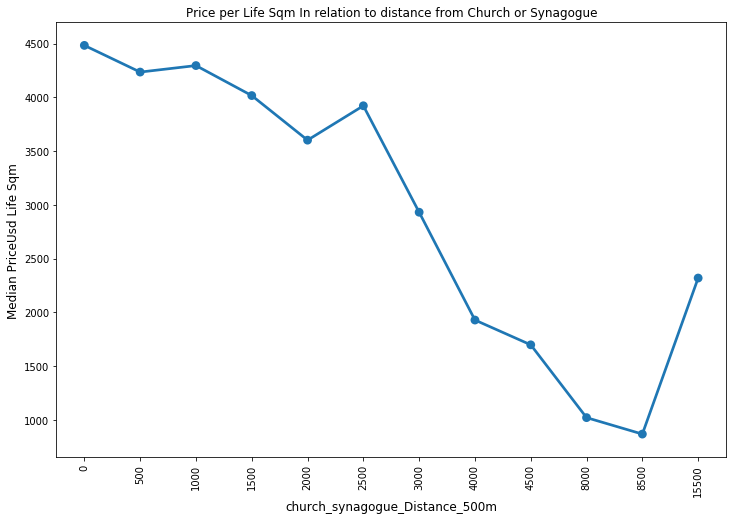

In [34]:
plt.figure(figsize=(12,8))
sns.pointplot(grouped_church_df.church_synagogue_500m.values, grouped_church_df.price_1_life_sq.values, alpha=0.8, color=color[0])
plt.ylabel('Median PriceUsd Life Sqm', fontsize=12)
plt.xlabel('church_synagogue_Distance_500m', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Price per Life Sqm In relation to distance from Church or Synagogue")
plt.show()

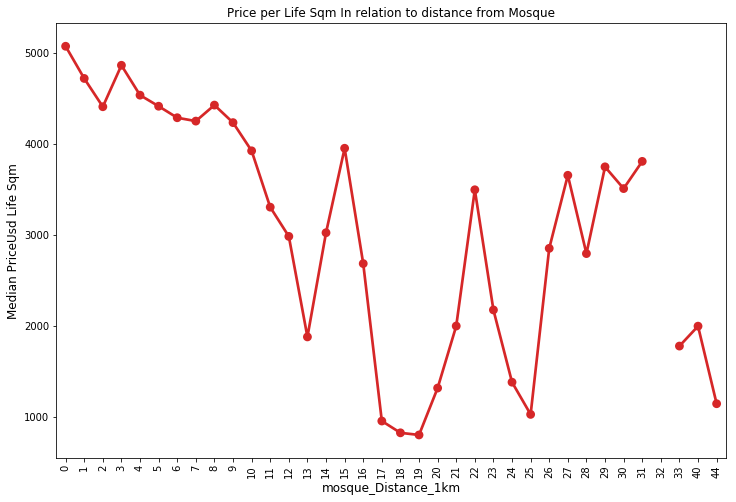

In [35]:
plt.figure(figsize=(12,8))
sns.pointplot(grouped_mosque_df.mosque_1km.values, grouped_mosque_df.price_1_life_sq.values, alpha=0.8, color=color[3])
plt.ylabel('Median PriceUsd Life Sqm', fontsize=12)
plt.xlabel('mosque_Distance_1km', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Price per Life Sqm In relation to distance from Mosque")
plt.show()

In [36]:
missing_df=sberbank_train_fillNA_df.isnull().sum(axis=0).reset_index()
missing_df.columns=['column_name', 'missing_count']
missing_df.columns
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df

,column_name,missing_count
3,life_sq,6383
4,floor,167
5,max_floor,9572
6,material,9572
7,build_year,13605
8,num_room,9572
9,kitch_sq,9572
10,state,1
18,preschool_quota,6688
21,school_quota,6685
